Principal Component Analysis (PCA) is a learning algorithm that reduces the dimensionality (number of features) within a dataset while still retaining as much information as possible.
PCA reduces dimensionality by finding a new set of features called components, which are composites of the original features, but are uncorrelated with one another. The first component accounts for the largest possible variability in the data, the second component the second most variability, and so on.


Let’s make sure all of us understand this point because it is critical to understand PCA. Why is a high variance of a covariate good? Well, assume, for example, you want to understand the effect of salary on a given outcome. Do you prefer to have a set of observations whose values for salary range from 1,000 to 2,000 or from 0 to 10,000? The larger the range of the variable salary, the more information we have about how such variable affects the outcome, right? Note that in the first scenario, we have no way of understanding the effect of salary on the outcome when the salary is smaller than 1,000 or larger than 2,000. The reason is that there is no data in such part of the space. Therefore, the larger the range of the covariate the more information. And, what is the effect of the range of a variable on its variance? Exactly, the larger the range, the larger the variance (the dispersion increases).Predictors with high variance provide more information than predictors with low variance!

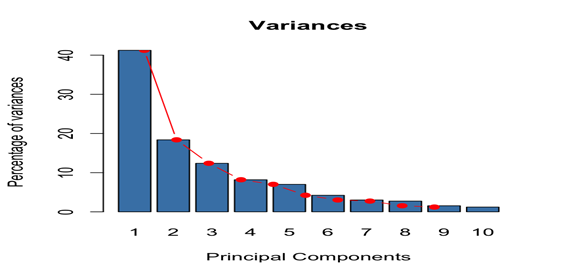

Sources :    
https://sebastianraschka.com/Articles/2014_pca_step_by_step.html   
https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9    
https://www.youtube.com/watch?v=N9MRzIHyA_Q    
### Steps Involved in the PCA    
Step 1: Standardize the dataset.     
Step 2: Calculate the covariance matrix for the features in the dataset.     
Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix       
Step 4: Sort eigenvalues and their corresponding eigenvectors.      
Step 5: Pick k eigenvalues and form a matrix of eigenvectors.     
Step 6: Transform the original matrix.   

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])

In [7]:
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='<U23')

In [8]:
df = pd.DataFrame(data,columns=columns)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
X = df.iloc[:, 1:29].values
Y = df.iloc[:, 30].values

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:

# step1 Scaling of features
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
scaled_data = scaler.transform(X)
scaled_data[0]

array([-2.07333501,  1.26993369,  0.9843749 ,  1.56846633,  3.28351467,
        2.65287398,  2.53247522,  2.21751501,  2.25574689,  2.48973393,
       -0.56526506,  2.83303087,  2.48757756, -0.21400165,  1.31686157,
        0.72402616,  0.66081994,  1.14875667,  0.90708308,  1.88668963,
       -1.35929347,  2.30360062,  2.00123749,  1.30768627,  2.61666502,
        2.10952635,  2.29607613,  2.75062224])

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=10)


In [41]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
pca.fit(scaled_data) # it have 10 PC
pca.components_

array([[ 1.07259238e-01,  2.31590697e-01,  2.25070194e-01,
         1.49956317e-01,  2.48386959e-01,  2.67960956e-01,
         2.69097219e-01,  1.46329330e-01,  7.03099642e-02,
         2.14836896e-01,  2.28885041e-02,  2.20515327e-01,
         2.10337145e-01,  2.08523571e-02,  1.79585318e-01,
         1.62757052e-01,  1.93639700e-01,  4.97684909e-02,
         1.09491267e-01,  2.32045752e-01,  1.07330933e-01,
         2.41282085e-01,  2.29340902e-01,  1.32960597e-01,
         2.16009137e-01,  2.35832839e-01,  2.57742025e-01,
         1.27274681e-01],
       [-7.32164987e-02, -2.32361380e-01, -2.47516007e-01,
         1.92286558e-01,  1.48911734e-01,  5.72159095e-02,
        -4.31629908e-02,  2.02702349e-01,  3.79989060e-01,
        -1.02801285e-01,  1.18122775e-01, -8.61244522e-02,
        -1.56747956e-01,  2.42867687e-01,  2.51210519e-01,
         2.18539691e-01,  1.54160911e-01,  2.23118323e-01,
         3.04050385e-01, -2.43769179e-01, -6.73273400e-02,
        -2.23076176e-01, -2.42

In [43]:
print("explained_variance_ratio",pca.explained_variance_ratio_) # using 2 PC we are getting approx 0.63% of varienace 0.44272026, 0.18971182
print("explained_variance_ratio_",pca.explained_variance_ratio_.sum())

explained_variance_ratio [0.443798   0.1783666  0.09485402 0.07006729 0.05820883 0.04281988
 0.01993034 0.01692594 0.01393277 0.0123376 ]
explained_variance_ratio_ 0.9512412710226329


In [44]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.00887506,  1.49295433, -1.496869  , ...,  0.1639695 ,
        -0.53988575,  0.76958279],
       [ 1.96440513, -3.7087169 , -0.09676325, ..., -0.08144114,
        -0.20223084, -1.13464584],
       [ 5.52898295, -0.99163639, -0.69540401, ..., -0.02199135,
         0.07782528, -0.49556379],
       ...,
       [ 1.16123227, -1.81055081,  0.88215865, ..., -0.37775072,
         0.38685809, -0.47722457],
       [10.01152225,  1.12737848, -1.86760793, ...,  0.19704503,
        -0.68154496, -0.05351098],
       [-5.1465113 , -0.74289949,  1.80372536, ..., -1.22468736,
         0.12919062,  0.05240825]])

In [45]:
scaled_data.shape

(569, 28)

In [46]:
x_pca.shape

(569, 10)

In [47]:
x_pca[568]

array([-5.1465113 , -0.74289949,  1.80372536, -2.11523843, -0.20134297,
        1.74161522,  1.30435744, -1.22468736,  0.12919062,  0.05240825])

Text(0, 0.5, 'Second Principal Component')

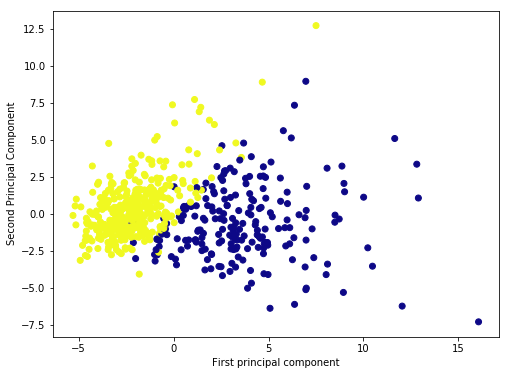

In [48]:

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')



## We have to apply PCA for Test data because,model is already trained on all features. As we are thinking PCA exclude the some features but in real time its not happen with PCA, It doses not remove any featues in principle components and each PC contains all Features(Cloumns) just their contibution is high or low based on varience.



## Applying PCA after scale and train_test_split




Step1 - Scaled data   
Step2 -  Passed Scaled data into train test split #X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.25, random_state = 0)  
Step3- Passed X_Train into PCA   
Step4- Fit into model X_Train and Y_Train   
Step5- For testing First convert the Test data i.e. X_Test into PCA with same component else will get Dimnesion error

In [11]:
from sklearn.preprocessing import StandardScaler
# step1 Scaling of features
scaler = StandardScaler()
scaler.fit(X)  # orignal X
scaled_data = scaler.transform(X)
scaled_data[0]

array([-2.07333501,  1.26993369,  0.9843749 ,  1.56846633,  3.28351467,
        2.65287398,  2.53247522,  2.21751501,  2.25574689,  2.48973393,
       -0.56526506,  2.83303087,  2.48757756, -0.21400165,  1.31686157,
        0.72402616,  0.66081994,  1.14875667,  0.90708308,  1.88668963,
       -1.35929347,  2.30360062,  2.00123749,  1.30768627,  2.61666502,
        2.10952635,  2.29607613,  2.75062224])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.model_selection import train_test_split # here I am applying PCA on scalled data then perform PCA
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.25, random_state = 0) 

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X_train) # it have 10 PC
pca.components_[0]

array([0.09934723, 0.23947828, 0.23862615, 0.14480671, 0.23742221,
       0.26441652, 0.27331644, 0.14026442, 0.05496606, 0.22830699,
       0.01141752, 0.22765636, 0.22966912, 0.01958372, 0.16131707,
       0.14909281, 0.17928899, 0.03401938, 0.10291733, 0.24226046,
       0.10153912, 0.24937308, 0.24428511, 0.13282162, 0.20462824,
       0.22230591, 0.25878865, 0.12271498])

In [19]:
x_pca1 = pca.transform(X_train)
x_pca1

array([[-2.69465847, -0.21313852, -0.59503287, ..., -0.30043192,
         0.52968246, -0.19660963],
       [-2.98809266,  1.32930075,  1.10675934, ..., -1.13877943,
        -0.60690217,  0.32090959],
       [ 3.76202966, -2.87338625,  1.9608203 , ...,  0.88166024,
         0.10214868,  0.43294075],
       ...,
       [-2.94672471,  0.29445116,  0.65101283, ...,  0.16136561,
         0.41773781,  0.80904458],
       [-5.33350894, -0.37835495,  4.25301306, ...,  3.61224238,
        -2.50110976,  2.9069141 ],
       [-1.07005974,  1.23937844,  1.36817851, ...,  0.71760684,
        -0.41697152,  1.33820692]])

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_pca1, Y_train)

C:\Users\pawan.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
x_pca_X_test = pca.transform(X_test)

In [22]:
Y_pred_aftersplitPCA = classifier.predict(x_pca_X_test)

In [23]:
Y_pred_aftersplitPCA

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])

In [64]:
Y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0.])

# Applying PCA before Train_test_split

In [25]:
x_pca_before = pca.transform(scaled_data) # scalled Data transformed into PCA of 10 component

In [26]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_pca_before, Y, test_size = 0.25, random_state = 0) 

## As we already doing PCA on train Test split so need to do PCA while testing time but if you will do PCA for other dataset(apart from train test split) then we have to PCA for testing as well

In [27]:
classifier.fit(X_train1, Y_train1)

C:\Users\pawan.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
Y_pred_beforeplitPCA = classifier.predict(X_test1)

In [32]:
Y_pred_beforeplitPCA

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])